In [2]:
#Importa modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

#from pmlb import fetch_data

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

#escolhe dataset
dt = iris

In [4]:
#Ignorar
'''#Estes metodos servem para matrizes não binárias
#A fazer: um metodo que dado um elemento da matriz, transforma o "resto" da matriz toda em uma matriz binaria para melhor fazer a analise
def accuracy(matrix):
    trace = matrix.trace()
    total_sum = matrix.sum()
    accuracy = trace/total_sum
    return accuracy

def recall(matrix, element_index):
    return matrix[element_index][element_index]/matrix[element_index].sum()'''

'#Estes metodos servem para matrizes não binárias\n#A fazer: um metodo que dado um elemento da matriz, transforma o "resto" da matriz toda em uma matriz binaria para melhor fazer a analise\ndef accuracy(matrix):\n    trace = matrix.trace()\n    total_sum = matrix.sum()\n    accuracy = trace/total_sum\n    return accuracy\n\ndef recall(matrix, element_index):\n    return matrix[element_index][element_index]/matrix[element_index].sum()'

In [5]:
dt.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [39]:
dt.target[0]

0

In [40]:
#stratifiedKFold = KFold que conserva a % de cada classe nos folds
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=False)

from sklearn import metrics

#dicionário para armazenar os folds e as metricas de cada iteração
metrics_dict = {'Train Index' : [],
                'Test Index' : [],
                'Confusion Matrix' : [],
                'Accuracy' : [],
                'Error' : [],
                'Recall' : [],
                'Precision' : [],
                'MCC' : [],
                'F1' : [],
                'Kappa' : [],
                'ROC AUC' : []}

#Cria o modelo
#logistic_model = LogisticRegression(solver='liblinear', multi_class='ovr')
model = RandomForestClassifier()


for train_index, test_index in folds.split(dt.data,dt.target): #divide e faz a iteração entre as folds
    X_train, X_test, y_train, y_test = dt.data[train_index], dt.data[test_index], \
                                       dt.target[train_index], dt.target[test_index] #divide instancias e labels em train set e test set
    
    print(X_train[0])
    print(y_train[0])
    metrics_dict['Train Index'].append(train_index)
    metrics_dict['Test Index'].append(test_index)
    
    #Treina o modelo
    model.fit(X_train, y_train)

    #faz predição no test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    metrics_dict['Confusion Matrix'].append(cm)

    acc = metrics.accuracy_score(y_test, y_pred)
    metrics_dict['Accuracy'].append(acc)
    metrics_dict['Error'].append(1-acc)
    metrics_dict['Recall'].append(metrics.recall_score(y_test, y_pred, average='weighted')) #sensibilidade
    metrics_dict['Precision'].append(metrics.precision_score(y_test, y_pred, average='weighted')) 
    metrics_dict['MCC'].append(metrics.matthews_corrcoef(y_test, y_pred))
    metrics_dict['F1'].append(metrics.f1_score(y_test, y_pred, average='weighted'))
    metrics_dict['Kappa'].append(metrics.cohen_kappa_score(y_test, y_pred))
    metrics_dict['ROC AUC'].append(metrics.roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted'))

[5.4 3.7 1.5 0.2]
0
[5.1 3.5 1.4 0.2]
0
[5.1 3.5 1.4 0.2]
0
[5.1 3.5 1.4 0.2]
0
[5.1 3.5 1.4 0.2]
0


In [33]:
#Transformando o dicionário em um pandas dataframe e depois exportando como .csv
dataframe = pd.DataFrame.from_dict(metrics_dict)
dataframe.to_csv('metrics.csv', float_format='%.10f')
type(dataframe['Accuracy'])

pandas.core.series.Series

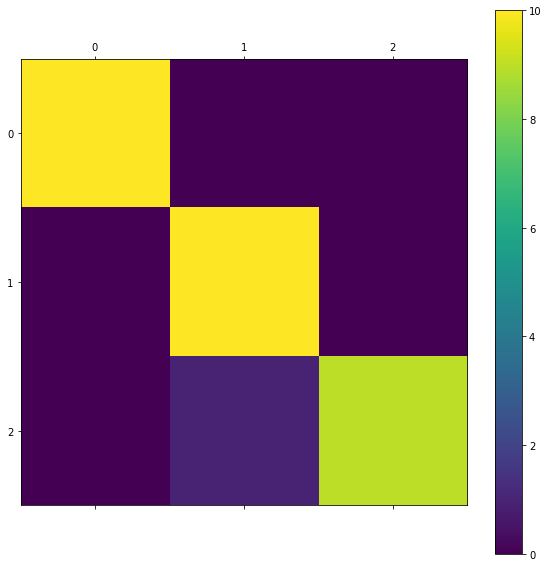

In [34]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_confusion_matrix(dataframe['Confusion Matrix'][1])